In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dim_matrix(matrix):
    return len(matrix),len(matrix[0])

def diag_to_matrix(array):
    length = len(array)
    matrix = np.zeros([length,length])

    for row in range(0, length):
        matrix[row][row] = array[row]

    return matrix

In [3]:
data  = pd.read_excel( "C:/Users/michelj8/Documents/GitHub/Hierarchial-Quantiles/SAGDP9N__ALL_AREAS_1997_2019.xlsx", sheet_name = 'Sheet1')

region_names = ['New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain', 'Far West']

In [4]:
region_data = data[data['GeoName'].isin(region_names)].copy()
region_data = region_data[ region_data['Description'] == 'All industry total']

region_data = region_data.set_index('GeoName')
year_list = range(1997,2020)

region_data = region_data[year_list]
region_data

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GeoName,,,,,,,,,,,,,,,,,,,,,
New England,644832,669175,698287,749473,759204,766491,784127,815683,830367,850020,...,871810,876671,889223,887832,895269,921314,931959,947188,967618,989428
Mideast,2.24494e+06,2.3016e+06,2.39992e+06,2490916,2.54198e+06,2.55842e+06,2.59597e+06,2.66873e+06,2.73868e+06,2789621,...,2.90574e+06,2.91994e+06,2.99304e+06,3.00069e+06,3058682,3.11704e+06,3.15889e+06,3200271,3.2587e+06,3.31691e+06
Great Lakes,1.88933e+06,1.9544e+06,2.02761e+06,2.08669e+06,2.06478e+06,2104604,2.14604e+06,2.19289e+06,2.22846e+06,2.24696e+06,...,2176944,2.22408e+06,2.25228e+06,2.27983e+06,2.33423e+06,2.36619e+06,2.39196e+06,2.42451e+06,2.47669e+06,2.50943e+06
Plains,776430,800283,822123,859065,858221,878108,908438,939327,963958,978289,...,1.01481e+06,1.0342e+06,1.05785e+06,1070846,1.09875e+06,1.11605e+06,1.12116e+06,1.13336e+06,1.15924e+06,1.17537e+06
Southeast,2.56666e+06,2685346,2.80753e+06,2876077,2.91572e+06,2.9824e+06,3.08104e+06,3219340,3.36685e+06,3.45621e+06,...,3.3826e+06,3403212,3.43104e+06,3.46831e+06,3.53062e+06,3.62416e+06,3.68754e+06,3.77614e+06,3.87557e+06,3.95984e+06
Southwest,1.22219e+06,1.29458e+06,1.35311e+06,1.40117e+06,1.43424e+06,1.46554e+06,1.49158e+06,1.56593e+06,1.62252e+06,1.72586e+06,...,1.80542e+06,1.85928e+06,1.94075e+06,2.00636e+06,2.07377e+06,2.16361e+06,2.17173e+06,2.22973e+06,2315907,2.40961e+06
Rocky Mountain,355741,381617,405658,432330,437611,442371,449350,461763,485663,508303,...,526382,534414,540442,555210,575093,598643,612409,634091,655295,677567
Far West,1.95343e+06,2.07156e+06,2.2146e+06,2.3613e+06,2.34801e+06,2.40417e+06,2.50587e+06,2.61445e+06,2744663,2.86041e+06,...,2.86234e+06,2.9097e+06,2.97915e+06,3.06507e+06,3.17787e+06,3.33131e+06,3.43287e+06,3.58075e+06,3736048,3.83837e+06


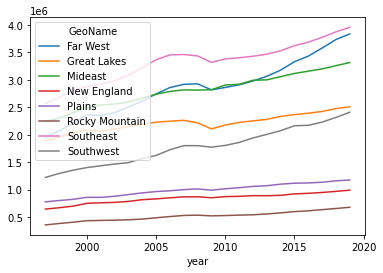

In [5]:
region_data_long = region_data.reset_index().melt( id_vars=['GeoName'], var_name='year', value_name = 'value')
region_data_long['value'] = region_data_long['value'].astype(float)
region_data = pd.pivot_table( region_data_long, index = 'year', columns = 'GeoName' , values = 'value')
region_data.plot()

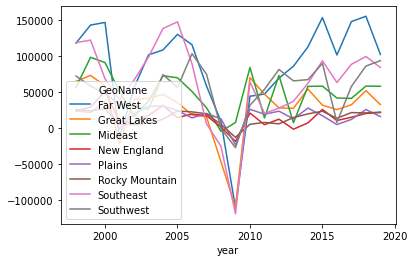

In [6]:
delta_region_data = region_data.diff(1).dropna()

delta_region_data.plot()

In [90]:
weight_matrix = np.zeros([8,8])

weight_matrix[0,1] = 1.0
weight_matrix[1,[0,2,4]] = 1.0/3.0
weight_matrix[2,[1,3,4]] = 1.0/3.0
weight_matrix[3,[2,4,5,6]] = 1.0/4.0
weight_matrix[4,[1,2,3,5]] = 1.0/4.0
weight_matrix[5,[3,4,6,7]] = 1.0/4.0
weight_matrix[6,[3,5,7]] = 1.0/3.0
weight_matrix[7,[5,6]] = 1.0/2.0

weight_matrix

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.33333333,
        0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.25      , 0.        , 0.25      ,
        0.25      , 0.25      , 0.        ],
       [0.        , 0.25      , 0.25      , 0.25      , 0.        ,
        0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.25      ,
        0.        , 0.25      , 0.25      ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.33333333, 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.5       , 0.        ]])

In [139]:
dynamic_spatial_data =  pd.pivot_table(delta_region_data.reset_index(), columns = 'year').loc[region_names]
train_list = dynamic_spatial_data.columns[0:-2]
train_data = dynamic_spatial_data[train_list]

rho = .3
alpha = train_data.mean(axis =1).values
phi = .05
lam = .1
total_time = 5
# total_time = 20

last_year = train_data.columns[-1]
length = len(weight_matrix)

id_matrix = diag_to_matrix(length*[1])
aux_matrix = rho* id_matrix + phi * weight_matrix
s_matrix = id_matrix - lam*weight_matrix

for forecast_period in range(0, total_time):
    new_year = str( int(last_year) + 1)
    
    old_vals = train_data[last_year].values
    new_vals =  np.dot( np.linalg.inv(s_matrix),  np.dot(aux_matrix,old_vals) ) 
    new_vals = new_vals + alpha 
    train_data[new_year] = new_vals
    
    last_year = new_year
    
train_data

<ipython-input-139-1c7867963745>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[new_year] = new_vals


year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
GeoName,,,,,,,,,,,,,,,,,,,,,
New England,24343.0,29112.1,51186.1,9731.0,7287.0,17636.0,31555.8,14684.3,19653.2,17495.9,...,-1390.9,7436.7,26044.7,10644.9,15229.6,23398.219711,27736.420549,29666.277212,30462.635319,30779.061393
Mideast,56664.0,98323.5,90991.3,51059.6,16443.0,37556.2,72756.8,69946.6,50942.8,28361.9,...,7644.7,57992.4,58360.3,41849.5,41379.2,64192.137111,71661.817796,74210.941581,75110.390763,75435.852593
Great Lakes,65070.4,73211.7,59085.3,-21913.9,39824.3,41436.3,46850.1,35569.8,18496.7,15805.5,...,27559.0,54398.5,31954.7,25775.5,32546.0,40710.220566,44270.151410,45748.275525,46344.953265,46581.684993
Plains,23853.7,21840.2,36941.2,-843.6,19887.2,30329.8,30888.6,24631.1,14331.6,20425.6,...,13000.6,27908.9,17292.5,5113.8,12203.3,26016.501809,30844.257156,32561.220460,33181.607720,33408.943340
Southeast,118681.9,122185.4,68545.6,39643.6,66675.9,98638.7,138304.8,147513.6,89354.8,6204.5,...,37269.7,62312.0,93535.0,63379.4,88605.7,90402.508058,92213.538762,93197.564171,93649.886622,93842.861932
Southwest,72393.7,58528.8,48057.2,33071.3,31303.2,26041.4,74342.8,56589.0,103341.2,75023.8,...,65611.4,67404.9,89842.4,8115.1,58007.3,73635.402824,78448.336271,79997.622817,80518.952868,80701.644575
Rocky Mountain,25876.1,24040.9,26671.3,5281.9,4759.8,6978.9,12413.0,23899.9,22640.4,20039.9,...,14767.7,19883.0,23549.8,13766.0,21681.7,26709.850894,28569.106918,29281.563342,29561.217578,29672.604315
Far West,118125.3,143045.5,146694.9,-13285.6,56153.8,101703.1,108581.5,130212.7,115749.8,58634.3,...,85922.4,112797.5,153444.2,101554.9,147885.2,129526.407186,124868.785158,123751.390435,123512.764807,123475.905648


In [140]:
dynamic_spatial_data

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GeoName,,,,,,,,,,,,,,,,,,,,,
New England,24343.0,29112.1,51186.1,9731.0,7287.0,17636.0,31555.8,14684.3,19653.2,17495.9,...,21053.3,4860.9,12552.4,-1390.9,7436.7,26044.7,10644.9,15229.6,20429.2,21810.5
Mideast,56664.0,98323.5,90991.3,51059.6,16443.0,37556.2,72756.8,69946.6,50942.8,28361.9,...,84240.8,14199.4,73101.6,7644.7,57992.4,58360.3,41849.5,41379.2,58432.5,58205.0
Great Lakes,65070.4,73211.7,59085.3,-21913.9,39824.3,41436.3,46850.1,35569.8,18496.7,15805.5,...,70164.5,47133.7,28198.0,27559.0,54398.5,31954.7,25775.5,32546.0,52175.8,32741.6
Plains,23853.7,21840.2,36941.2,-843.6,19887.2,30329.8,30888.6,24631.1,14331.6,20425.6,...,26237.7,19394.9,23642.9,13000.6,27908.9,17292.5,5113.8,12203.3,25878.9,16128.2
Southeast,118681.9,122185.4,68545.6,39643.6,66675.9,98638.7,138304.8,147513.6,89354.8,6204.5,...,64172.0,20615.8,27830.1,37269.7,62312.0,93535.0,63379.4,88605.7,99430.9,84269.3
Southwest,72393.7,58528.8,48057.2,33071.3,31303.2,26041.4,74342.8,56589.0,103341.2,75023.8,...,31895.2,53862.4,81474.2,65611.4,67404.9,89842.4,8115.1,58007.3,86173.1,93699.6
Rocky Mountain,25876.1,24040.9,26671.3,5281.9,4759.8,6978.9,12413.0,23899.9,22640.4,20039.9,...,5448.4,8031.4,6028.7,14767.7,19883.0,23549.8,13766.0,21681.7,21204.8,22272.0
Far West,118125.3,143045.5,146694.9,-13285.6,56153.8,101703.1,108581.5,130212.7,115749.8,58634.3,...,44376.4,47367.7,69445.0,85922.4,112797.5,153444.2,101554.9,147885.2,155294.3,102325.6


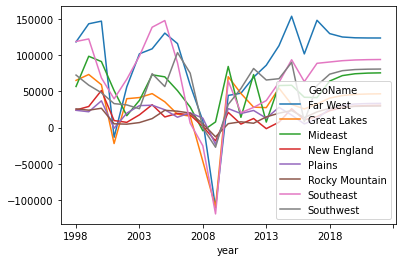

In [141]:
plot_df_long = train_data.reset_index().melt( id_vars=['GeoName'], var_name='year', value_name = 'value')
plot_df_long['value'] = plot_df_long['value'].astype(float)
pd.pivot_table( plot_df_long, index = 'year', columns = 'GeoName' , values = 'value').plot()

In [142]:
train_data[['2018','2019']]

year,2018,2019
GeoName,,
New England,23398.219711,27736.420549
Mideast,64192.137111,71661.817796
Great Lakes,40710.220566,44270.151410
Plains,26016.501809,30844.257156
Southeast,90402.508058,92213.538762
Southwest,73635.402824,78448.336271
Rocky Mountain,26709.850894,28569.106918
Far West,129526.407186,124868.785158


In [143]:
dynamic_spatial_data[[2018,2019]]

year,2018,2019
GeoName,,
New England,20429.2,21810.5
Mideast,58432.5,58205.0
Great Lakes,52175.8,32741.6
Plains,25878.9,16128.2
Southeast,99430.9,84269.3
Southwest,86173.1,93699.6
Rocky Mountain,21204.8,22272.0
Far West,155294.3,102325.6
